## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  25.973424  1311.690607  0.355087  3.805262  1.689042
1  64.128896  1167.796789  0.638361  1.438269  1.557661
2  92.984945  1217.487590  0.036725  2.719457  0.536461
3  90.228529   289.251794  0.973413  1.036139  1.279512
4  56.841771   823.210520  0.398534  8.616206  1.445613


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.04984 | train_mse: 2.54101 | train_mae: 1.18734 |  0:00:00s
epoch 1  | loss: 0.93825 | train_mse: 0.943   | train_mae: 0.77952 |  0:00:00s


epoch 2  | loss: 0.90019 | train_mse: 1.5892  | train_mae: 0.94891 |  0:00:00s
epoch 3  | loss: 0.75965 | train_mse: 1.26842 | train_mae: 0.82915 |  0:00:00s
epoch 4  | loss: 0.51317 | train_mse: 1.01895 | train_mae: 0.7868  |  0:00:00s


epoch 5  | loss: 0.41973 | train_mse: 1.64377 | train_mae: 0.98133 |  0:00:00s
epoch 6  | loss: 0.81019 | train_mse: 0.87178 | train_mae: 0.74166 |  0:00:00s
epoch 7  | loss: 0.52954 | train_mse: 0.62882 | train_mae: 0.63361 |  0:00:01s


epoch 8  | loss: 0.43984 | train_mse: 0.67662 | train_mae: 0.64691 |  0:00:01s
epoch 9  | loss: 0.60849 | train_mse: 0.71477 | train_mae: 0.6457  |  0:00:01s
epoch 10 | loss: 0.40323 | train_mse: 0.57992 | train_mae: 0.59199 |  0:00:01s


epoch 11 | loss: 0.33584 | train_mse: 0.47469 | train_mae: 0.53646 |  0:00:01s
epoch 12 | loss: 0.28941 | train_mse: 0.54345 | train_mae: 0.54495 |  0:00:01s
epoch 13 | loss: 0.44666 | train_mse: 0.67939 | train_mae: 0.58399 |  0:00:01s


epoch 14 | loss: 0.33228 | train_mse: 0.59401 | train_mae: 0.54213 |  0:00:01s
epoch 15 | loss: 0.24174 | train_mse: 0.44909 | train_mae: 0.47045 |  0:00:01s
epoch 16 | loss: 0.23684 | train_mse: 0.40787 | train_mae: 0.43715 |  0:00:01s


epoch 17 | loss: 0.19549 | train_mse: 0.42984 | train_mae: 0.44223 |  0:00:01s
epoch 18 | loss: 0.22347 | train_mse: 0.48561 | train_mae: 0.46746 |  0:00:01s
epoch 19 | loss: 0.29132 | train_mse: 0.39251 | train_mae: 0.40739 |  0:00:02s


epoch 20 | loss: 0.35238 | train_mse: 0.32384 | train_mae: 0.37387 |  0:00:02s
epoch 21 | loss: 0.28878 | train_mse: 0.3073  | train_mae: 0.36341 |  0:00:02s
epoch 22 | loss: 0.19356 | train_mse: 0.29236 | train_mae: 0.35689 |  0:00:02s


epoch 23 | loss: 0.14845 | train_mse: 0.26973 | train_mae: 0.33434 |  0:00:02s
epoch 24 | loss: 0.1532  | train_mse: 0.20818 | train_mae: 0.27861 |  0:00:02s
epoch 25 | loss: 0.21021 | train_mse: 0.17666 | train_mae: 0.26222 |  0:00:02s


epoch 26 | loss: 0.25995 | train_mse: 0.10626 | train_mae: 0.24391 |  0:00:02s
epoch 27 | loss: 0.17272 | train_mse: 0.13582 | train_mae: 0.27631 |  0:00:02s
epoch 28 | loss: 0.26352 | train_mse: 0.15194 | train_mae: 0.2801  |  0:00:02s


epoch 29 | loss: 0.17421 | train_mse: 0.19477 | train_mae: 0.33408 |  0:00:02s
epoch 30 | loss: 0.14335 | train_mse: 0.22    | train_mae: 0.35658 |  0:00:03s
epoch 31 | loss: 0.215   | train_mse: 0.21286 | train_mae: 0.34592 |  0:00:03s


epoch 32 | loss: 0.16365 | train_mse: 0.21445 | train_mae: 0.34895 |  0:00:03s
epoch 33 | loss: 0.15025 | train_mse: 0.1932  | train_mae: 0.32943 |  0:00:03s
epoch 34 | loss: 0.10413 | train_mse: 0.13493 | train_mae: 0.27523 |  0:00:03s


epoch 35 | loss: 0.1451  | train_mse: 0.11131 | train_mae: 0.24796 |  0:00:03s
epoch 36 | loss: 0.16092 | train_mse: 0.10926 | train_mae: 0.24463 |  0:00:03s
epoch 37 | loss: 0.15952 | train_mse: 0.11079 | train_mae: 0.24274 |  0:00:03s


epoch 38 | loss: 0.30813 | train_mse: 0.13433 | train_mae: 0.27038 |  0:00:03s
epoch 39 | loss: 0.21743 | train_mse: 0.09294 | train_mae: 0.23512 |  0:00:03s
epoch 40 | loss: 0.16983 | train_mse: 0.08642 | train_mae: 0.22572 |  0:00:03s


epoch 41 | loss: 0.16302 | train_mse: 0.10981 | train_mae: 0.25842 |  0:00:03s
epoch 42 | loss: 0.23783 | train_mse: 0.12158 | train_mae: 0.2753  |  0:00:04s
epoch 43 | loss: 0.16123 | train_mse: 0.11058 | train_mae: 0.26578 |  0:00:04s


epoch 44 | loss: 0.11718 | train_mse: 0.0956  | train_mae: 0.24589 |  0:00:04s
epoch 45 | loss: 0.13295 | train_mse: 0.08842 | train_mae: 0.24066 |  0:00:04s
epoch 46 | loss: 0.1203  | train_mse: 0.08539 | train_mae: 0.24636 |  0:00:04s


epoch 47 | loss: 0.12009 | train_mse: 0.19424 | train_mae: 0.29157 |  0:00:04s
epoch 48 | loss: 0.2019  | train_mse: 0.10661 | train_mae: 0.2585  |  0:00:04s
epoch 49 | loss: 0.10256 | train_mse: 0.07841 | train_mae: 0.23073 |  0:00:04s


epoch 50 | loss: 0.10623 | train_mse: 0.06556 | train_mae: 0.20945 |  0:00:04s
epoch 51 | loss: 0.1512  | train_mse: 0.06728 | train_mae: 0.20803 |  0:00:04s
epoch 52 | loss: 0.10678 | train_mse: 0.05916 | train_mae: 0.19843 |  0:00:04s


epoch 53 | loss: 0.28849 | train_mse: 0.06864 | train_mae: 0.2053  |  0:00:04s
epoch 54 | loss: 0.11261 | train_mse: 0.06296 | train_mae: 0.19752 |  0:00:05s
epoch 55 | loss: 0.11612 | train_mse: 0.07264 | train_mae: 0.21909 |  0:00:05s


epoch 56 | loss: 0.13757 | train_mse: 0.08442 | train_mae: 0.23049 |  0:00:05s
epoch 57 | loss: 0.10537 | train_mse: 0.06359 | train_mae: 0.20685 |  0:00:05s
epoch 58 | loss: 0.108   | train_mse: 0.06862 | train_mae: 0.21502 |  0:00:05s


epoch 59 | loss: 0.16373 | train_mse: 0.08035 | train_mae: 0.22371 |  0:00:05s
epoch 60 | loss: 0.10902 | train_mse: 0.0787  | train_mae: 0.2261  |  0:00:05s
epoch 61 | loss: 0.1962  | train_mse: 0.09344 | train_mae: 0.24357 |  0:00:05s


epoch 62 | loss: 0.12183 | train_mse: 0.09926 | train_mae: 0.2419  |  0:00:05s
epoch 63 | loss: 0.14463 | train_mse: 0.08757 | train_mae: 0.22654 |  0:00:05s
epoch 64 | loss: 0.12666 | train_mse: 0.06603 | train_mae: 0.20178 |  0:00:05s


epoch 65 | loss: 0.1287  | train_mse: 0.05892 | train_mae: 0.19548 |  0:00:06s
epoch 66 | loss: 0.11527 | train_mse: 0.06199 | train_mae: 0.20238 |  0:00:06s


epoch 67 | loss: 0.17378 | train_mse: 0.05426 | train_mae: 0.18829 |  0:00:06s
epoch 68 | loss: 0.24477 | train_mse: 0.05981 | train_mae: 0.19286 |  0:00:06s


epoch 69 | loss: 0.09981 | train_mse: 0.13138 | train_mae: 0.26542 |  0:00:06s
epoch 70 | loss: 0.16846 | train_mse: 0.11974 | train_mae: 0.26473 |  0:00:06s
epoch 71 | loss: 0.12047 | train_mse: 0.08463 | train_mae: 0.21332 |  0:00:06s


epoch 72 | loss: 0.10982 | train_mse: 0.06977 | train_mae: 0.20033 |  0:00:06s
epoch 73 | loss: 0.2383  | train_mse: 0.09158 | train_mae: 0.24398 |  0:00:06s
epoch 74 | loss: 0.09142 | train_mse: 0.06892 | train_mae: 0.2042  |  0:00:07s


epoch 75 | loss: 0.07747 | train_mse: 0.08125 | train_mae: 0.2207  |  0:00:07s
epoch 76 | loss: 0.14261 | train_mse: 0.0812  | train_mae: 0.21886 |  0:00:07s
epoch 77 | loss: 0.21104 | train_mse: 0.0768  | train_mae: 0.20844 |  0:00:07s


epoch 78 | loss: 0.12512 | train_mse: 0.07835 | train_mae: 0.21948 |  0:00:07s
epoch 79 | loss: 0.07425 | train_mse: 0.06718 | train_mae: 0.19304 |  0:00:07s
epoch 80 | loss: 0.06661 | train_mse: 0.07146 | train_mae: 0.20242 |  0:00:07s


epoch 81 | loss: 0.10526 | train_mse: 0.07098 | train_mae: 0.20694 |  0:00:07s
epoch 82 | loss: 0.09717 | train_mse: 0.05769 | train_mae: 0.18274 |  0:00:07s
epoch 83 | loss: 0.1984  | train_mse: 0.0792  | train_mae: 0.20447 |  0:00:07s


epoch 84 | loss: 0.07946 | train_mse: 0.07533 | train_mae: 0.19965 |  0:00:07s
epoch 85 | loss: 0.13306 | train_mse: 0.07112 | train_mae: 0.20018 |  0:00:07s
epoch 86 | loss: 0.06938 | train_mse: 0.06391 | train_mae: 0.19361 |  0:00:08s


epoch 87 | loss: 0.13452 | train_mse: 0.04674 | train_mae: 0.17007 |  0:00:08s
epoch 88 | loss: 0.08373 | train_mse: 0.05412 | train_mae: 0.17622 |  0:00:08s
epoch 89 | loss: 0.11792 | train_mse: 0.06367 | train_mae: 0.18688 |  0:00:08s


epoch 90 | loss: 0.12914 | train_mse: 0.07467 | train_mae: 0.19888 |  0:00:08s
epoch 91 | loss: 0.15486 | train_mse: 0.0683  | train_mae: 0.19006 |  0:00:08s
epoch 92 | loss: 0.08584 | train_mse: 0.0522  | train_mae: 0.16829 |  0:00:08s


epoch 93 | loss: 0.08978 | train_mse: 0.04946 | train_mae: 0.17484 |  0:00:08s
epoch 94 | loss: 0.14837 | train_mse: 0.04246 | train_mae: 0.16196 |  0:00:08s


epoch 95 | loss: 0.07962 | train_mse: 0.04847 | train_mae: 0.1708  |  0:00:08s
epoch 96 | loss: 0.10776 | train_mse: 0.05346 | train_mae: 0.17979 |  0:00:09s
epoch 97 | loss: 0.07825 | train_mse: 0.05399 | train_mae: 0.18182 |  0:00:09s


epoch 98 | loss: 0.07913 | train_mse: 0.06172 | train_mae: 0.1956  |  0:00:09s
epoch 99 | loss: 0.09727 | train_mse: 0.05997 | train_mae: 0.1953  |  0:00:09s
epoch 100| loss: 0.11549 | train_mse: 0.04705 | train_mae: 0.16566 |  0:00:09s


epoch 101| loss: 0.10702 | train_mse: 0.04579 | train_mae: 0.16232 |  0:00:09s
epoch 102| loss: 0.10881 | train_mse: 0.04631 | train_mae: 0.16923 |  0:00:09s
epoch 103| loss: 0.13439 | train_mse: 0.06071 | train_mae: 0.19918 |  0:00:09s


epoch 104| loss: 0.09364 | train_mse: 0.06523 | train_mae: 0.19887 |  0:00:09s
epoch 105| loss: 0.12804 | train_mse: 0.05462 | train_mae: 0.17823 |  0:00:09s
epoch 106| loss: 0.09142 | train_mse: 0.05815 | train_mae: 0.1819  |  0:00:09s


epoch 107| loss: 0.13426 | train_mse: 0.0753  | train_mae: 0.20774 |  0:00:09s
epoch 108| loss: 0.07719 | train_mse: 0.07552 | train_mae: 0.2063  |  0:00:10s
epoch 109| loss: 0.075   | train_mse: 0.07271 | train_mae: 0.19972 |  0:00:10s


epoch 110| loss: 0.07184 | train_mse: 0.05778 | train_mae: 0.18425 |  0:00:10s
epoch 111| loss: 0.12715 | train_mse: 0.06583 | train_mae: 0.19515 |  0:00:10s
epoch 112| loss: 0.1632  | train_mse: 0.07273 | train_mae: 0.20966 |  0:00:10s


epoch 113| loss: 0.16866 | train_mse: 0.06793 | train_mae: 0.20453 |  0:00:10s
epoch 114| loss: 0.14127 | train_mse: 0.0489  | train_mae: 0.18254 |  0:00:10s
epoch 115| loss: 0.07578 | train_mse: 0.05043 | train_mae: 0.18793 |  0:00:10s


epoch 116| loss: 0.11637 | train_mse: 0.05441 | train_mae: 0.18983 |  0:00:10s
epoch 117| loss: 0.0724  | train_mse: 0.05277 | train_mae: 0.18574 |  0:00:10s
epoch 118| loss: 0.1359  | train_mse: 0.0752  | train_mae: 0.21037 |  0:00:10s


epoch 119| loss: 0.13382 | train_mse: 0.07949 | train_mae: 0.22234 |  0:00:10s
epoch 120| loss: 0.08923 | train_mse: 0.07047 | train_mae: 0.21221 |  0:00:11s
epoch 121| loss: 0.09161 | train_mse: 0.05874 | train_mae: 0.19698 |  0:00:11s


epoch 122| loss: 0.08858 | train_mse: 0.05789 | train_mae: 0.19159 |  0:00:11s
epoch 123| loss: 0.1538  | train_mse: 0.08242 | train_mae: 0.21636 |  0:00:11s
epoch 124| loss: 0.12653 | train_mse: 0.06189 | train_mae: 0.20071 |  0:00:11s


epoch 125| loss: 0.07693 | train_mse: 0.07312 | train_mae: 0.21569 |  0:00:11s
epoch 126| loss: 0.06232 | train_mse: 0.09454 | train_mae: 0.24046 |  0:00:11s
epoch 127| loss: 0.09555 | train_mse: 0.1034  | train_mae: 0.25544 |  0:00:11s


epoch 128| loss: 0.05823 | train_mse: 0.11232 | train_mae: 0.26282 |  0:00:11s
epoch 129| loss: 0.23798 | train_mse: 0.10802 | train_mae: 0.25266 |  0:00:11s
epoch 130| loss: 0.26669 | train_mse: 0.06441 | train_mae: 0.2053  |  0:00:11s


epoch 131| loss: 0.11538 | train_mse: 0.06377 | train_mae: 0.20251 |  0:00:11s
epoch 132| loss: 0.21742 | train_mse: 0.0659  | train_mae: 0.20647 |  0:00:12s
epoch 133| loss: 0.07965 | train_mse: 0.08879 | train_mae: 0.22228 |  0:00:12s


epoch 134| loss: 0.15872 | train_mse: 0.10817 | train_mae: 0.23769 |  0:00:12s
epoch 135| loss: 0.10081 | train_mse: 0.06438 | train_mae: 0.19392 |  0:00:12s
epoch 136| loss: 0.08305 | train_mse: 0.04822 | train_mae: 0.17449 |  0:00:12s


epoch 137| loss: 0.14845 | train_mse: 0.04875 | train_mae: 0.16541 |  0:00:12s
epoch 138| loss: 0.14296 | train_mse: 0.05441 | train_mae: 0.17676 |  0:00:12s
epoch 139| loss: 0.14702 | train_mse: 0.04985 | train_mae: 0.16663 |  0:00:12s


epoch 140| loss: 0.10357 | train_mse: 0.05382 | train_mae: 0.17922 |  0:00:12s
epoch 141| loss: 0.14871 | train_mse: 0.05546 | train_mae: 0.18181 |  0:00:12s
epoch 142| loss: 0.15435 | train_mse: 0.05905 | train_mae: 0.17874 |  0:00:12s


epoch 143| loss: 0.08203 | train_mse: 0.04515 | train_mae: 0.16326 |  0:00:13s
epoch 144| loss: 0.107   | train_mse: 0.05213 | train_mae: 0.17693 |  0:00:13s

Early stopping occurred at epoch 144 with best_epoch = 94 and best_train_mae = 0.16196
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

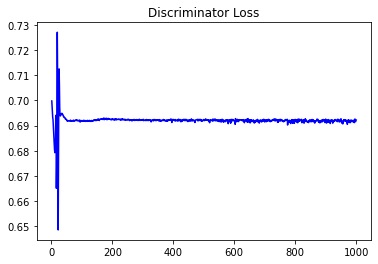

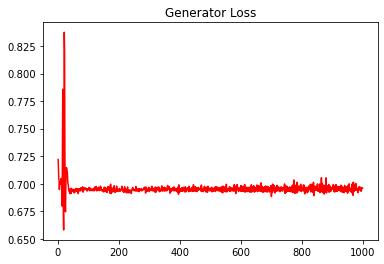

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1724042547028717


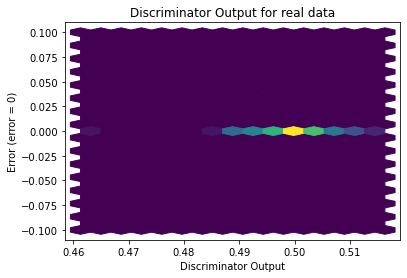

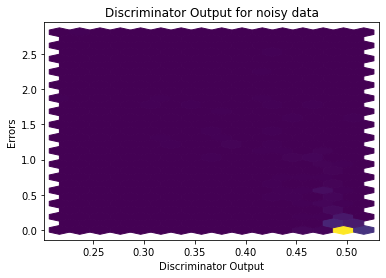

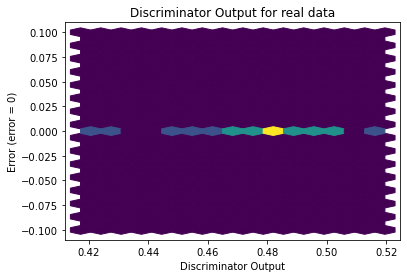

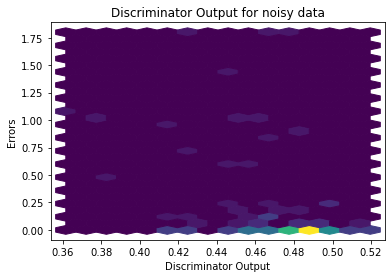

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


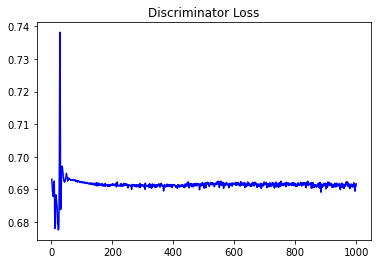

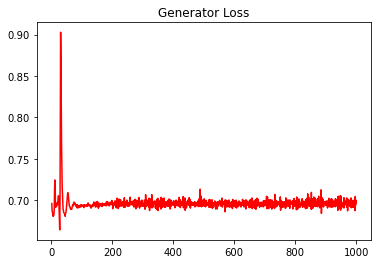

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2973274919033122


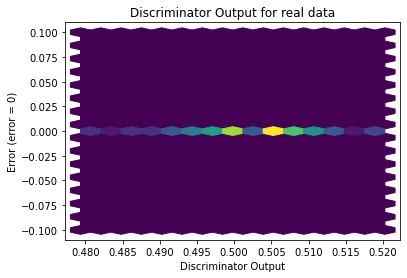

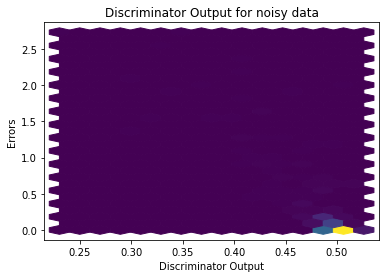

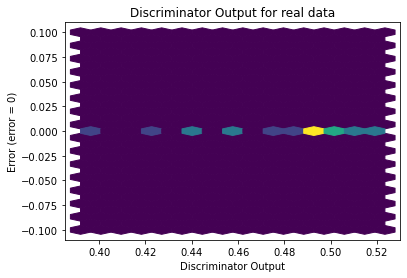

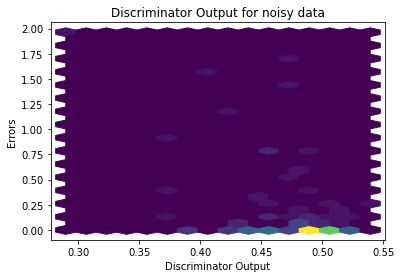

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4638]], requires_grad=True)
